In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('database.csv')

In [3]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [5]:
df.info()
#Columns that contain null values: name,armed,age,gender,race,flee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
id                         2142 non-null int64
name                       2123 non-null object
date                       2142 non-null object
manner_of_death            2142 non-null object
armed                      2136 non-null object
age                        2099 non-null float64
gender                     2141 non-null object
race                       2039 non-null object
city                       2142 non-null object
state                      2142 non-null object
signs_of_mental_illness    2142 non-null bool
threat_level               2142 non-null object
flee                       2106 non-null object
body_camera                2142 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 205.1+ KB


In [7]:
df.describe()
#Mean age is 38.5

,id,age
count,2142.00000,2099.000000
mean,1232.21662,36.484516
std,670.62817,12.874000
min,3.00000,6.000000
25%,664.50000,26.000000
50%,1231.50000,34.000000
75%,1811.75000,45.000000
max,2394.00000,86.000000


In [9]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
df.shape

(2142, 14)

In [13]:
Weapon_count=pd.DataFrame(df['armed'].value_counts().nlargest(10))
Weapon_count

,armed
gun,1173
knife,319
unarmed,155
vehicle,136
undetermined,101
toy weapon,92
machete,16
unknown weapon,14
sword,8
baseball bat,7


Text(0.5, 0, 'Weapon types')

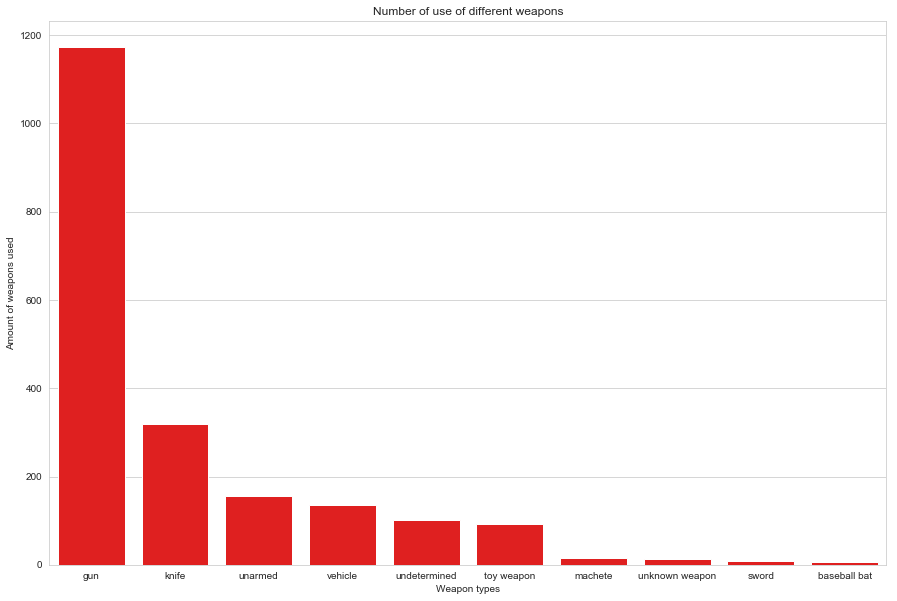

In [17]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.barplot(data=Weapon_count,x=Weapon_count.index,y='armed',color='red')
plt.title('Number of use of different weapons')
plt.ylabel('Amount of weapons used')
plt.xlabel('Weapon types')
#It can be seen that gun is the most common weapon 

In [18]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [19]:
df['manner_of_death'].value_counts()

shot                1992
shot and Tasered     150
Name: manner_of_death, dtype: int64

In [22]:
df['city'].value_counts().head()

Los Angeles    31
Houston        24
Phoenix        24
Chicago        23
Columbus       16
Name: city, dtype: int64

In [23]:
df['city'].nunique()

1247

Text(0.5, 1.0, 'Top 20 number of deaths in US cities')

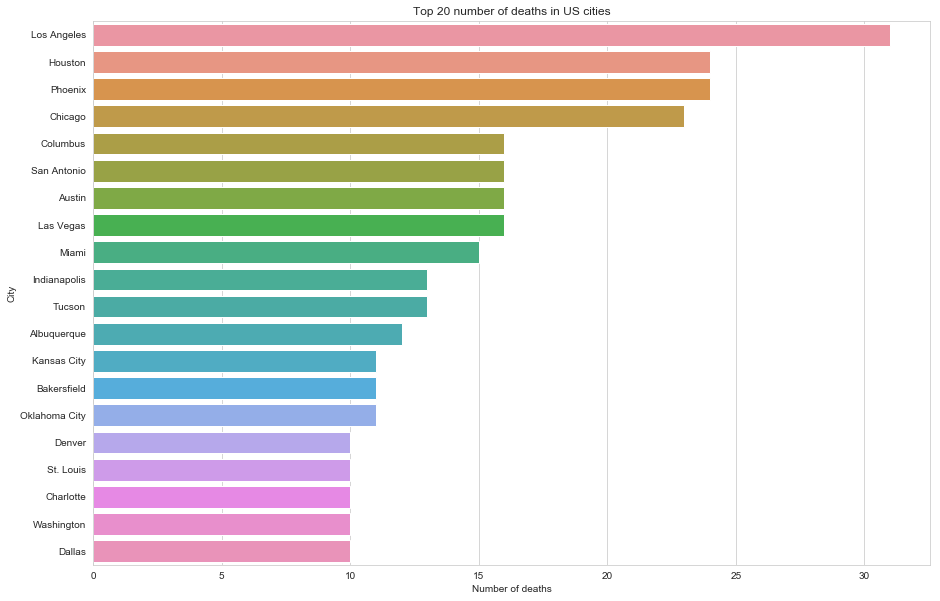

In [30]:
City_count=pd.DataFrame(df['city'].value_counts().nlargest(20))
City_count
plt.figure(figsize=(15,10))
sns.barplot(data=City_count,x='city',y=City_count.index)
plt.xlabel('Number of deaths')
plt.ylabel('City')
plt.title('Top 20 number of deaths in US cities')


In [28]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


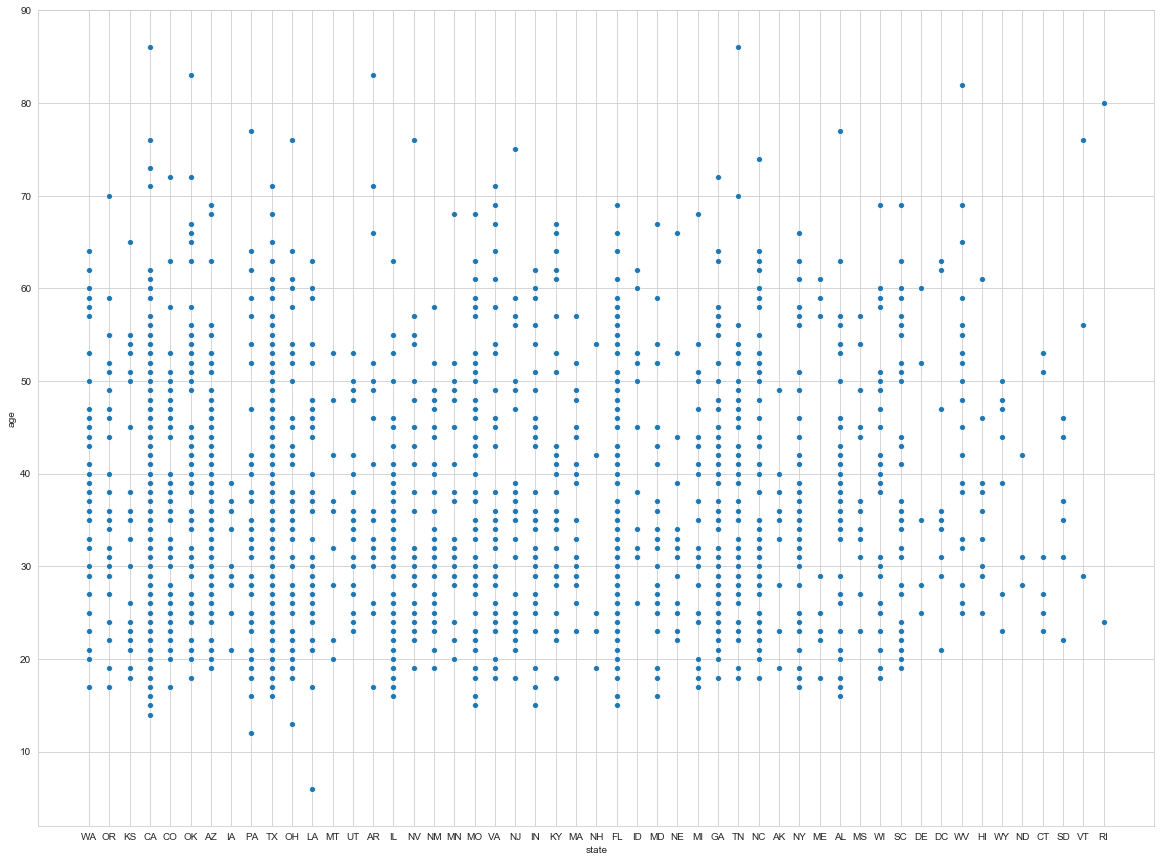

In [33]:
df['state'].value_counts()
plt.figure(figsize=(20,15))
sns.scatterplot(data=df,x='state',y='age')

In [34]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


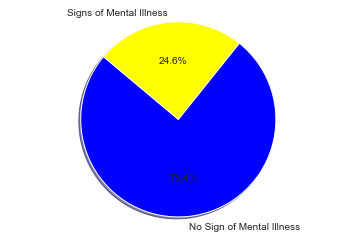

In [36]:
labels = 'No Sign of Mental Illness', 'Signs of Mental Illness',
sizes = [1395, 456,]
colors = ['blue', 'yellow',]
explode = (0, 0,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

In [37]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [47]:
df['armed'].value_counts().head()

gun             1173
knife            319
unarmed          155
vehicle          136
undetermined     101
Name: armed, dtype: int64

Text(0, 0.5, 'Type of weapons')

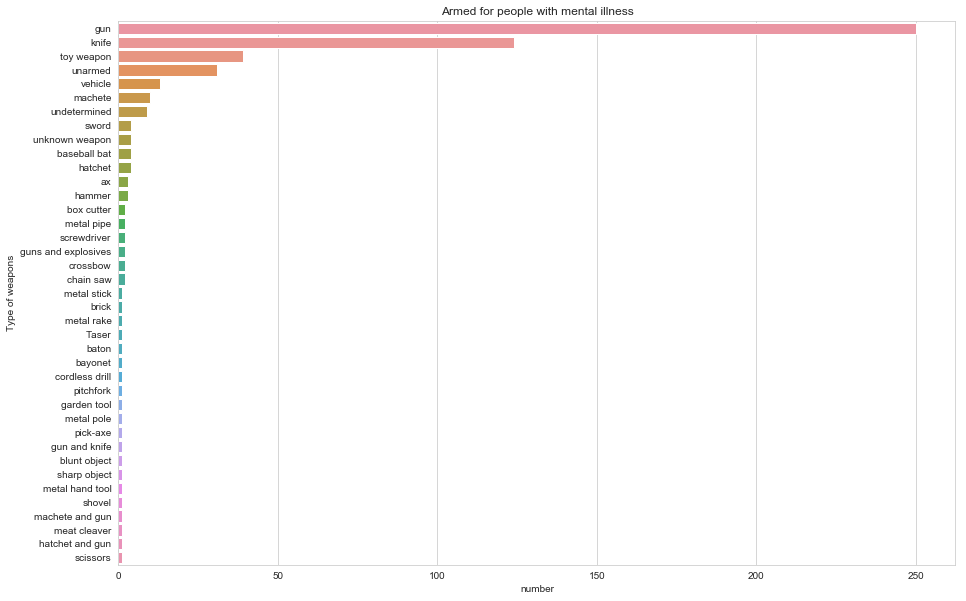

In [54]:
Mental_armed=pd.DataFrame(df[df['signs_of_mental_illness']==True]['armed'].value_counts())
Mental_armed.head()
Mental_armed.columns=['number']
Mental_armed.head()
plt.figure(figsize=(15,10))
sns.barplot(data=Mental_armed,x='number',y=Mental_armed.index)
plt.title('Armed for people with mental illness')
plt.ylabel('Type of weapons')

In [55]:
#mental illness X state
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


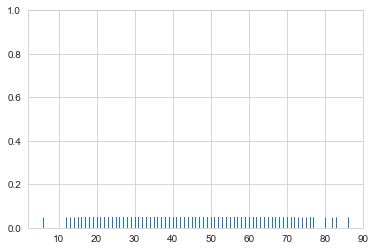

In [60]:
sns.rugplot(df['age'])

In [65]:
import plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


In [66]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [78]:
df['state'].value_counts().head()

CA    355
TX    197
FL    129
AZ     95
NC     65
Name: state, dtype: int64

In [85]:
df2=pd.DataFrame(df['state'].value_counts())

In [86]:
data = dict(type='choropleth',
           locations=df['state'],
           colorscale='Portland',
           locationmode='USA-states',
           text=df2,
           colorbar={'title':'Colorbar title'})

In [87]:
layout=dict(geo={'scope':'usa'})

In [88]:
choromap=go.Figure(data=[data],layout=layout)

In [89]:
iplot(choromap)

In [95]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [96]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [97]:
df['race']=df['race'].replace({'A':'Asian','W':'White','H':'Hispanic','B':'Black','O':'Others','N':'Native American'})

In [98]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


In [101]:
df['race'].unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Others', nan,
       'Native American'], dtype=object)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
id                         2142 non-null int64
name                       2123 non-null object
date                       2142 non-null object
manner_of_death            2142 non-null object
armed                      2136 non-null object
age                        2099 non-null float64
gender                     2141 non-null object
race                       2039 non-null object
city                       2142 non-null object
state                      2142 non-null object
signs_of_mental_illness    2142 non-null bool
threat_level               2142 non-null object
flee                       2106 non-null object
body_camera                2142 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 205.1+ KB


In [110]:
df['race'].value_counts()
#There are 103 nan values for race

White              1041
Black               542
Hispanic            367
Asian                33
Native American      28
Others               28
Name: race, dtype: int64

In [112]:
df['race'].dropna(inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
id                         2142 non-null int64
name                       2123 non-null object
date                       2142 non-null object
manner_of_death            2142 non-null object
armed                      2136 non-null object
age                        2099 non-null float64
gender                     2141 non-null object
race                       2039 non-null object
city                       2142 non-null object
state                      2142 non-null object
signs_of_mental_illness    2142 non-null bool
threat_level               2142 non-null object
flee                       2106 non-null object
body_camera                2142 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 204.3+ KB


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
id                         2142 non-null int64
name                       2123 non-null object
date                       2142 non-null object
manner_of_death            2142 non-null object
armed                      2136 non-null object
age                        2099 non-null float64
gender                     2141 non-null object
race                       2039 non-null object
city                       2142 non-null object
state                      2142 non-null object
signs_of_mental_illness    2142 non-null bool
threat_level               2142 non-null object
flee                       2106 non-null object
body_camera                2142 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 204.3+ KB


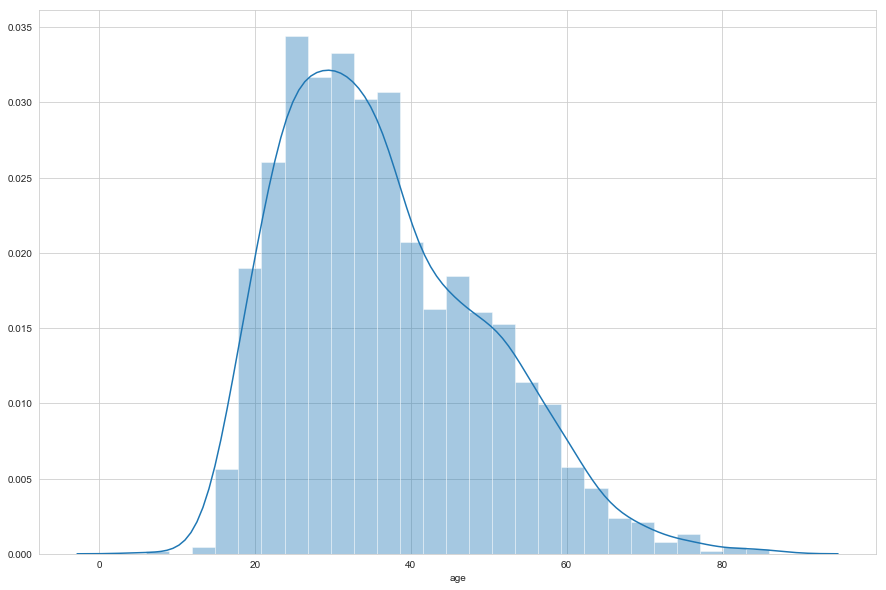

In [122]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'].dropna())

In [123]:
##This ends my simple analysis and visualization about fatal police shootings